# EDA with python

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store=pd.read_csv('superstore.csv', encoding="latin1") #Load dataset

## Basic Exploration

In [3]:
store.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
store.shape

(9994, 21)

In [5]:
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
store.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [7]:
store.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
store.duplicated().sum()

0

In [10]:
store.columns = store.columns.str.lower()
store.columns = store.columns.str.replace(' ','_')
store.columns = store.columns.str.replace('-','_')
store.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [11]:
store['order_date'] =pd.to_datetime(store['order_date'])
store['ship_date'] =pd.to_datetime(store['ship_date'])

In [12]:
store.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [13]:
store['total_sales'] = store['quantity'] * store['sales']

In [14]:
store.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_sales
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,523.92
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2195.82


## Data Analysis with python

In [15]:
#Total Sales per region
sales_by_region = store.groupby('region')['sales'].sum()
sales_by_region

region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: sales, dtype: float64

In [16]:
#Average Sales per category
avg_sales_per_category = store.groupby('category')['sales'].mean()
avg_sales_per_category

category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: sales, dtype: float64

In [17]:
#Total Sales per ship mode
sales_per_ship_mode = store.groupby('ship_mode')['sales'].sum()
sales_per_ship_mode

ship_mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: sales, dtype: float64

In [18]:
store['category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: category, dtype: int64

In [19]:
store['category'].nunique()

3

In [20]:
store['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
store['region'].value_counts(normalize=True)

West       0.320492
East       0.284971
Central    0.232439
South      0.162097
Name: region, dtype: float64

## Filtering Rows

In [22]:
store[store['sales']>1000]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_sales
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092,15355.656
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.0,240.2649,3133.890
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,21584.010
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,7682.808
54,55,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,5,0.0,298.6855,5149.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,9867,US-2015-116981,2015-03-26,2015-03-28,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,...,East,OFF-ST-10002615,Office Supplies,Storage,"Dual Level, Single-Width Filing Carts",1085.420,7,0.0,282.2092,7597.940
9925,9926,CA-2015-159534,2015-03-20,2015-03-23,First Class,DH-13075,Dave Hallsten,Corporate,United States,New York City,...,East,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,1087.936,8,0.2,353.5792,8703.488
9929,9930,CA-2016-129630,2016-09-04,2016-09-04,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,West,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.960,5,0.2,944.9865,13999.800
9947,9948,CA-2017-121559,2017-06-01,2017-06-03,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,Central,FUR-CH-10003746,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.880,6,0.0,539.2464,11555.280


In [23]:
store[(store['sales']>1000) & (store['region'] == 'West')]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_sales
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.20,85.3092,15355.656
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.00,240.2649,3133.890
67,68,CA-2014-106376,2014-12-05,2014-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,...,West,OFF-AR-10002671,Office Supplies,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.024,8,0.20,111.3024,8904.192
251,252,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,...,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,3347.370,13,0.00,636.0003,43515.810
282,283,CA-2015-130890,2015-11-02,2015-11-06,Standard Class,JO-15280,Jas O'Carroll,Consumer,United States,Los Angeles,...,West,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",1038.840,5,0.20,51.9420,5194.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,9650,CA-2016-107104,2016-11-26,2016-11-30,Standard Class,MS-17365,Maribeth Schnelling,Consumer,United States,Los Angeles,...,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,3406.664,8,0.15,160.3136,27253.312
9660,9661,CA-2016-160717,2016-06-06,2016-06-11,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Santa Barbara,...,West,TEC-PH-10001459,Technology,Phones,Samsung Galaxy Mega 6.3,3023.928,9,0.20,226.7946,27215.352
9759,9760,CA-2016-146913,2016-10-31,2016-11-05,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,...,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.20,70.1960,7019.600
9857,9858,CA-2015-164301,2015-03-26,2015-03-30,Standard Class,EB-13840,Ellis Ballard,Corporate,United States,Seattle,...,West,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,3393.680,8,0.00,610.8624,27149.440


## Group by aggregations

In [24]:
store.groupby('region')[['sales']].sum()

,sales
region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


In [25]:
store.groupby(['region','category'])['sales'].mean().reset_index()

,region,category,sales
0,Central,Furniture,340.534644
1,Central,Office Supplies,117.458801
2,Central,Technology,405.753124
3,East,Furniture,346.574383
4,East,Office Supplies,120.044425
5,East,Technology,495.278469
6,South,Furniture,353.309289
7,South,Office Supplies,126.282727
8,South,Technology,507.753952
9,West,Furniture,357.302325


In [26]:
store['month'] = store['order_date'].dt.month
store.groupby('month')[['sales','profit']].agg(['sum','mean'])


sales                  profit           
               sum        mean         sum       mean
month                                                
1       94924.8356  249.146550   9134.4461  23.974924
2       59751.2514  199.170838  10294.6107  34.315369
3      205005.4888  294.548116  28594.6872  41.084321
4      137762.1286  206.230731  11587.4363  17.346462
5      155028.8117  210.923553  22411.3078  30.491575
6      152718.6793  212.996763  21285.7954  29.687302
7      147238.0970  207.377601  13832.6648  19.482626
8      159044.0630  225.274877  21776.9384  30.845522
9      307649.9457  222.451154  36857.4753  26.650380
10     200322.9847  244.594609  31784.0413  38.808353
11     352461.0710  239.606438  35468.4265  24.111779
12     325293.5035  231.032318  43369.1919  30.801983

## Sorting and Ranking

In [27]:
store.sort_values('sales',ascending = False)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_sales,month
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,135830.880,3
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,87499.750,10
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,55999.840,3
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,44799.872,10
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,31499.910,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,US-2014-152723,2014-09-26,2014-09-26,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,...,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016,0.876,9
4711,4712,CA-2014-112403,2014-03-31,2014-03-31,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,...,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964,0.852,3
8658,8659,CA-2016-168361,2016-06-21,2016-06-25,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,...,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376,0.836,6
9292,9293,CA-2017-124114,2017-03-02,2017-03-02,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,...,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452,0.556,3


In [28]:
store.nlargest(5,'profit')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_sales,month
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760,87499.75,10
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808,55999.84,3
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.9856,31499.91,11
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.3700,128605.62,12
4098,4099,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,4630.4755,47249.75,9


In [29]:
store['sales_rank'] = store['sales'].rank(ascending=False)

In [30]:
store.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,sub_category,product_name,sales,quantity,discount,profit,total_sales,month,sales_rank
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,523.92,11,2121.5
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2195.82,11,719.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,29.24,6,7876.5


## Pivot Table

In [31]:
store.pivot_table(index='region', columns='category', values='sales', aggfunc='sum') 

category,Furniture,Office Supplies,Technology
region,,,
Central,163797.1638,167026.415,170416.312
East,208291.2040,205516.055,264973.981
South,117298.6840,125651.313,148771.908
West,252612.7435,220853.249,251991.832


## Exporting results

In [32]:
store.to_csv('cleaned_store.csv', index=False)

In [33]:
store1= store.pivot_table(index='region', columns='category', values='sales', aggfunc='sum')

In [34]:
store1.to_csv('sample_pivot.csv')

## Visualization using seaborn

### Distribution Plot

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

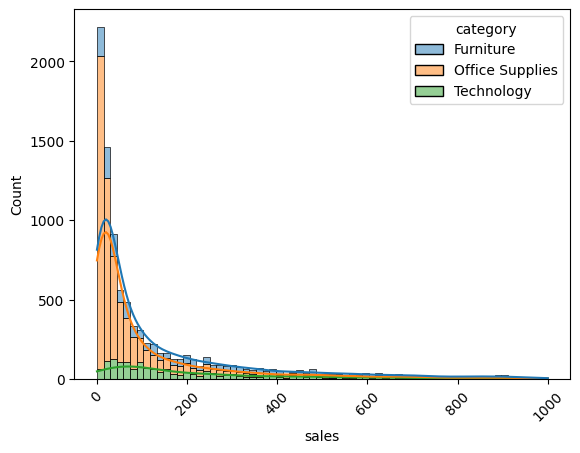

In [52]:
sns.histplot(data = store[store['sales']<1000], x = 'sales', hue = 'category',kde = True, multiple = 'stack')
plt.xticks(rotation = 45)

### Joint Plot

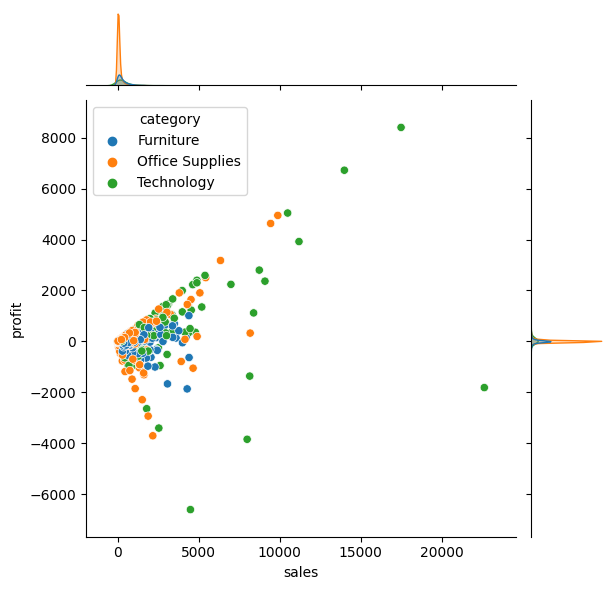

In [60]:
sns.jointplot(data=store, x='sales', y='profit', kind='scatter', hue= 'category')

### Pair plot

Text(0.5, 1.0, 'Pair Plot')

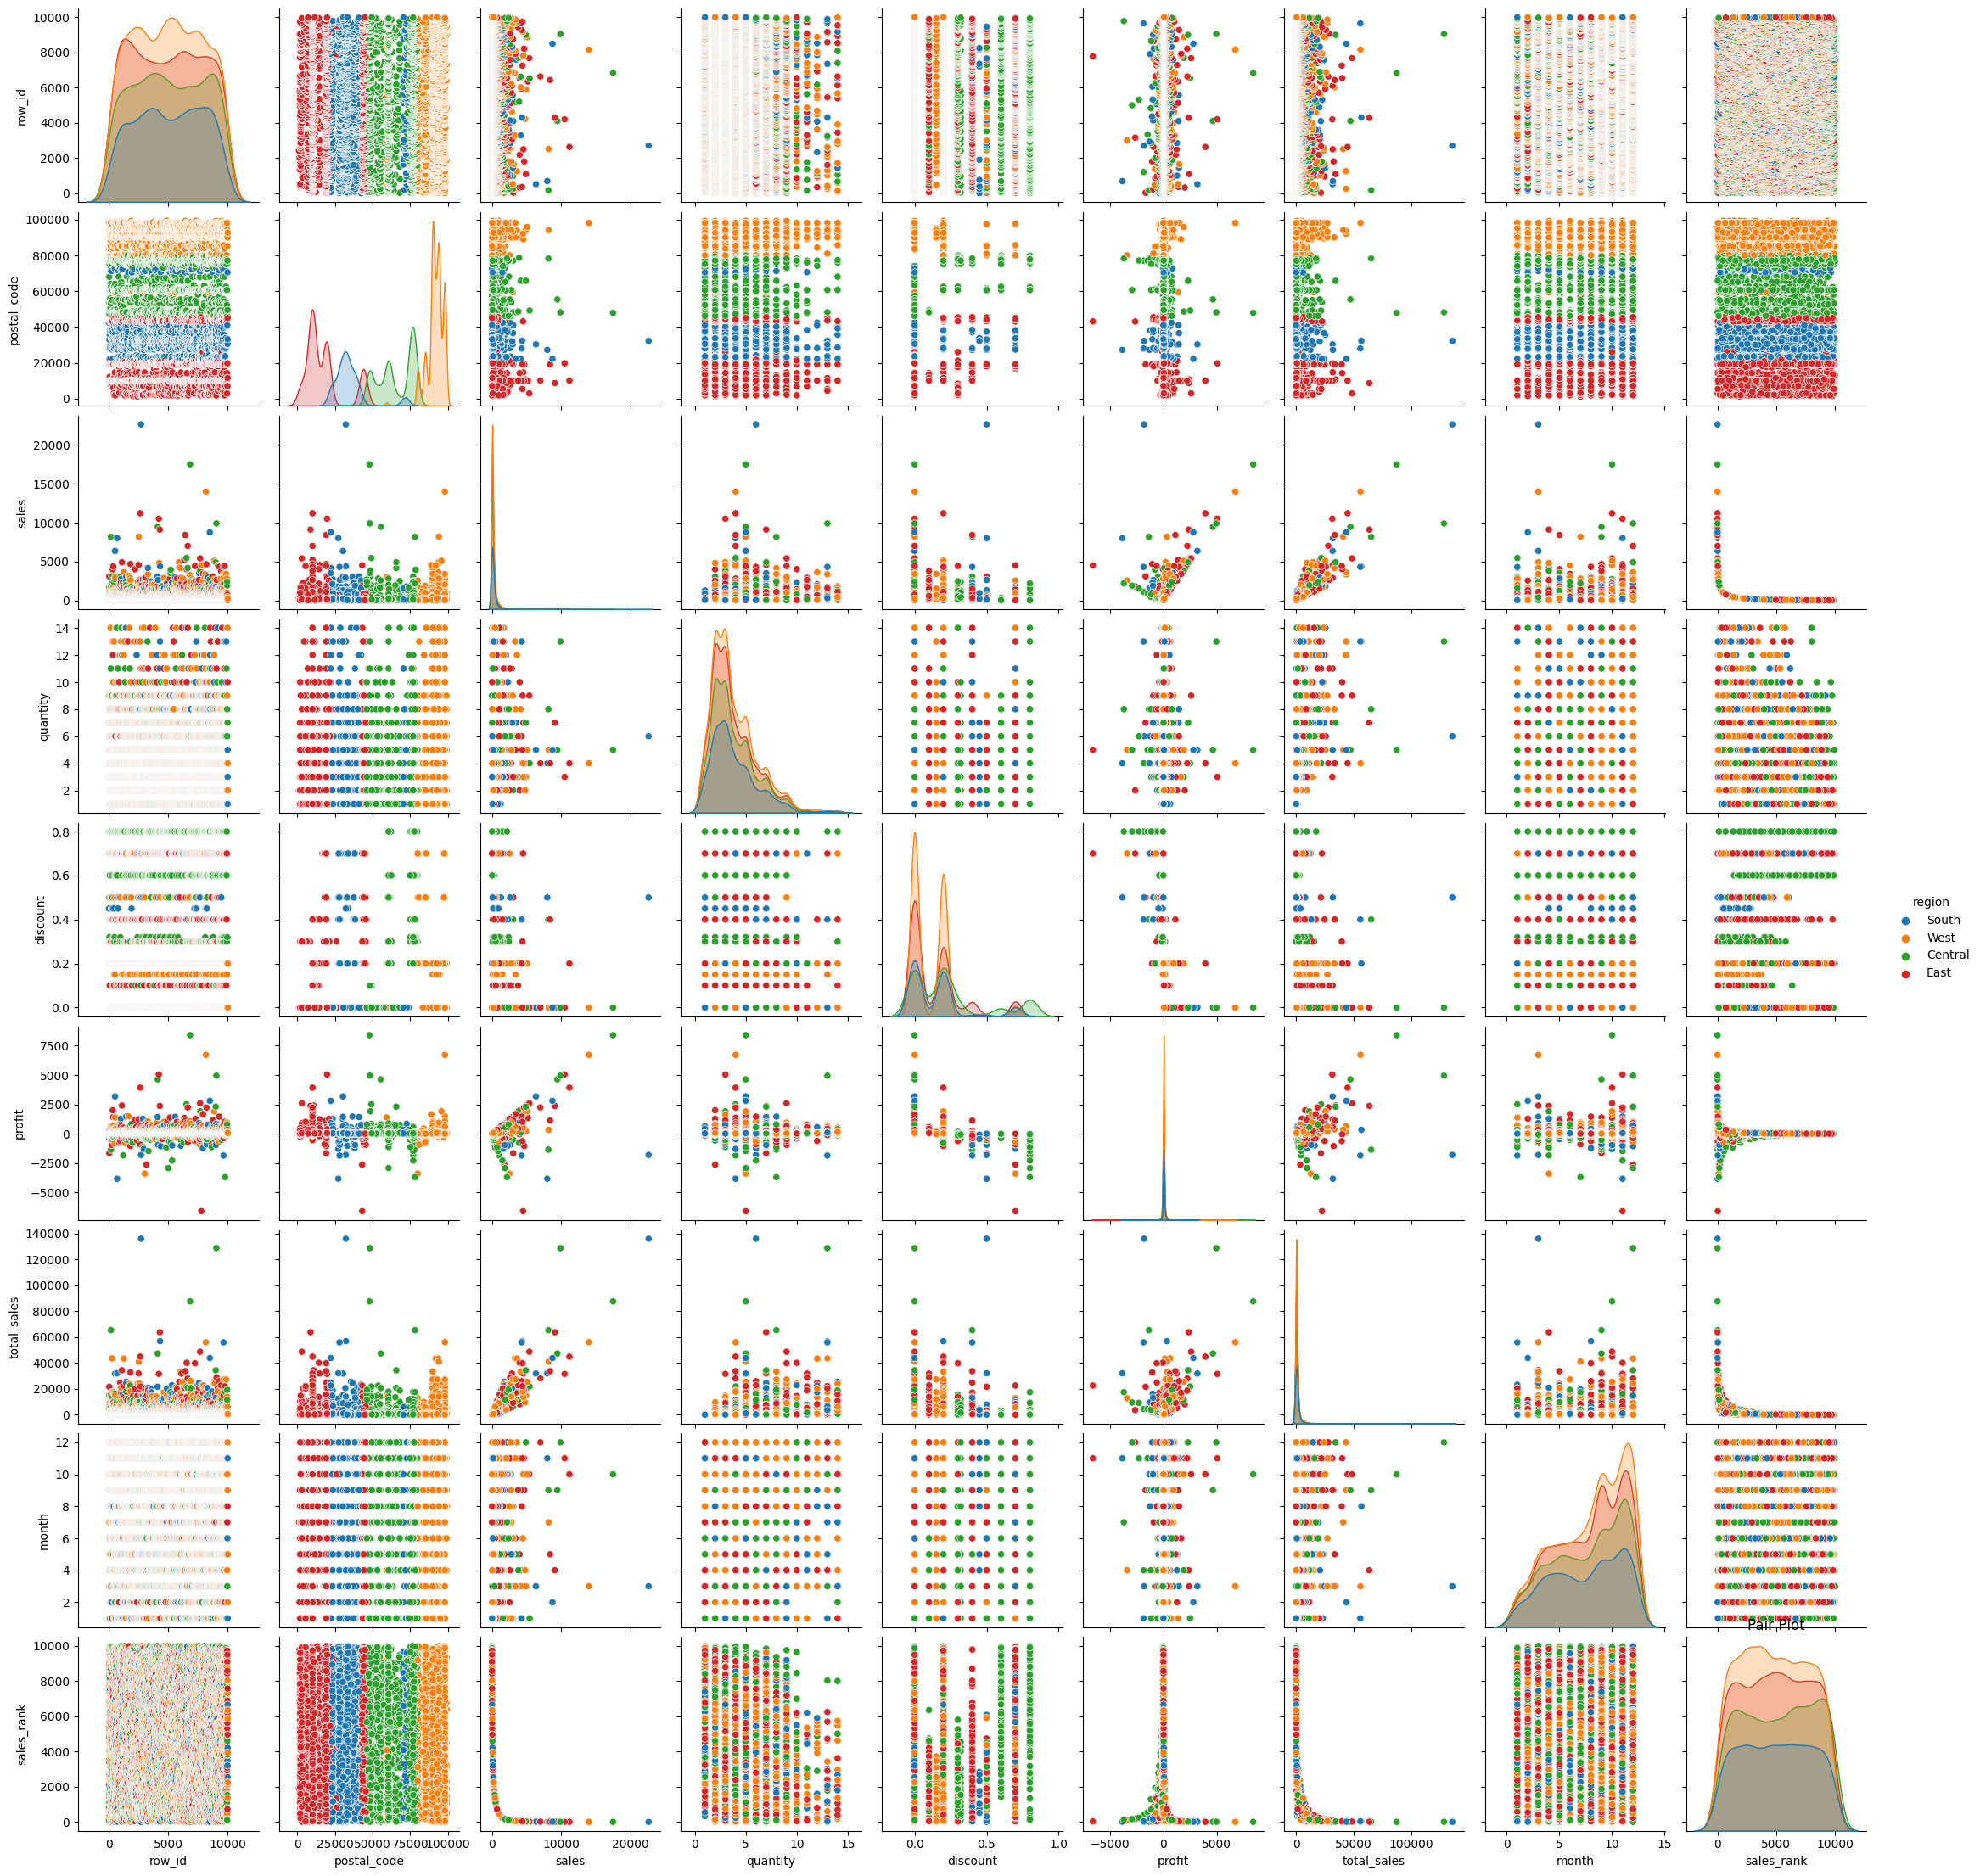

In [81]:
sns.pairplot(data=store, hue='region')
plt.title('Pair Plot')

## Categorical plots

### Bar plot

Text(0.5, 1.0, 'Category vs Sales')

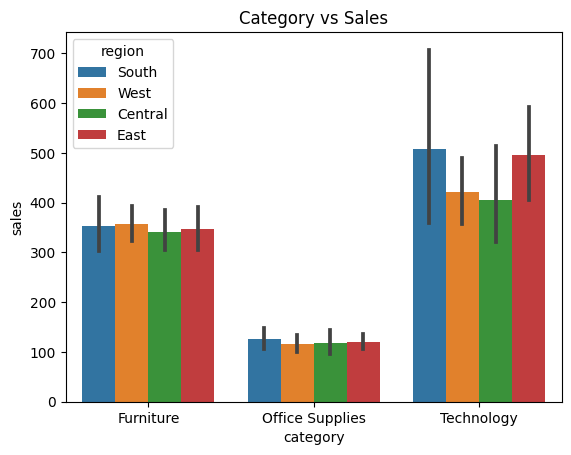

In [68]:
sns.barplot(x='category', y='sales', hue='region', data=store)
plt.title('Category vs Sales')

### Count Plot

Text(0.5, 1.0, 'Category count for different regions')

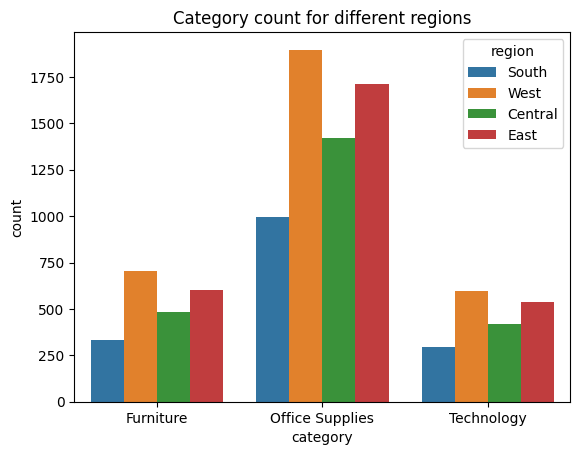

In [82]:
sns.countplot(x='category', hue = 'region',data=store)
plt.title('Category count for different regions')

### Box plot

<AxesSubplot:xlabel='category', ylabel='profit'>

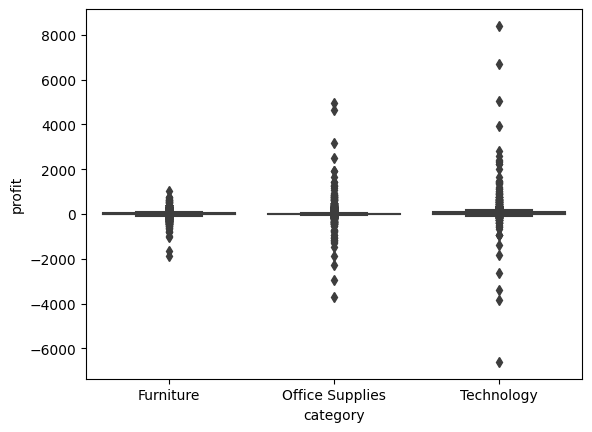

In [79]:
sns.boxplot(x='category', y='profit', data = store)

<AxesSubplot:xlabel='sales', ylabel='profit'>

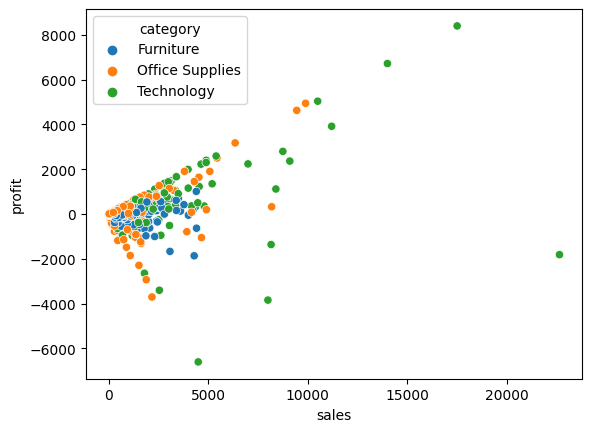

In [80]:
sns.scatterplot(x='sales', y='profit', hue='category', data=store)

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

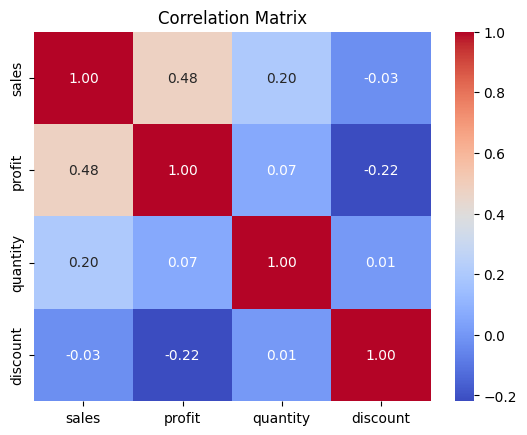

In [84]:
corr = store[['sales', 'profit', 'quantity', 'discount']].corr()
sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt ='.2f')
plt.title('Correlation Matrix')